In [ ]:
from ni_eeg_forward_project.util import get_labels_of_points
from neurolib.models.eeg import EEGModel
import mne
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from neurolib.utils.collections import dotdict
import numpy as np

In [3]:
params_eeg = dotdict({})
eeg = EEGModel(params_eeg)

Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
outer skin  CM is  -0.21 -19.38  -0.23 mm
outer skull CM is  -0.19 -19.34  -0.49 mm
inner skull CM is  -0.53 -21.10   6.21 mm
Checking that surface outer skull is inside surface outer skin  ...
Checking that surface inner skull is inside surface outer skull ...
Checking distance between outer skin  and outer skull surfaces...
Minimum distance between the outer skin  and outer skull surfaces is approximately    1.6 mm
Checking distance between outer skull and inner skull surfaces...
Minimum distance between the outer skull and inner skull surfaces is approximately    5.4 mm
Surfaces passed the basic topology checks.
Complete.

Approximation method : Linear collocation

Three-layer model surfaces loaded.
Computing the linear collocation s

In [4]:
forward_solution = mne.make_forward_solution(eeg.info, trans=eeg.trans, src=eeg.src, bem=eeg.bem,
                                meg=False, eeg=True, mindist=0.0)

Source space          : <SourceSpaces: [<volume, shape=(33, 39, 34), n_used=14629>] MRI (surface RAS) coords, subject 'fsaverage', ~10.8 MB>
MRI -> head transform : /Users/martin/anaconda3/envs/mne/lib/python3.10/site-packages/mne/data/fsaverage/fsaverage-trans.fif
Measurement data      : instance of Info
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 1 source spaces a total of 14629 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999994  0.003552  0.000202      -1.76 mm
    -0.003558  0.998389  0.056626      31.09 mm
    -0.000001 -0.056626  0.998395      39.60 mm
     0.000000  0.000000  0.000000       1.00

Read  94 EEG channels from info
Head coordinate coil definitions created.
Source spaces are now in head coordinates.

Employing the head->MRI coordinate transform with the BEM model.
BEM model instance of ConductorModel is now set up

Source spaces a

In [5]:
fname = "../../neurolib/data/datasets/eeg_fsaverage/fsaverage_fwd_sol/fsaverage_default-fwd.fif"
mne.write_forward_solution(fname, forward_solution)

    Write a source space...
    [done]
    1 source spaces written


In [6]:
fwd = mne.read_forward_solution(fname)

Reading forward solution from /Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/ni_eeg_forward_project/playground_dev/../../neurolib/data/datasets/eeg_fsaverage/fsaverage_fwd_sol/fsaverage_default-fwd.fif...
    Reading a source space...
    [done]
    1 source spaces read
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (14629 sources, 94 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


In [14]:
print(fwd.keys())
fwd['src'][0].keys()

dict_keys(['source_ori', 'coord_frame', 'nsource', 'nchan', 'sol', '_orig_sol', 'sol_grad', 'mri_head_t', 'info', 'src', 'source_rr', '_orig_source_ori', 'source_nn', 'surf_ori'])


dict_keys(['id', 'type', 'shape', 'src_mri_t', 'mri_ras_t', 'vox_mri_t', 'mri_width', 'mri_height', 'mri_depth', 'mri_volume_name', 'neighbor_vert', 'np', 'ntri', 'coord_frame', 'rr', 'nn', 'tris', 'nuse', 'inuse', 'vertno', 'nuse_tri', 'use_tris', 'nearest', 'nearest_dist', 'pinfo', 'patch_inds', 'dist', 'dist_limit', 'subject_his_id'])

In [15]:
lh = fwd['src'][0]
dip_pos = lh['rr'][lh['vertno']]  # The position of the dipoles
dip_ori = lh['nn'][lh['vertno']]
print(dip_pos.shape)

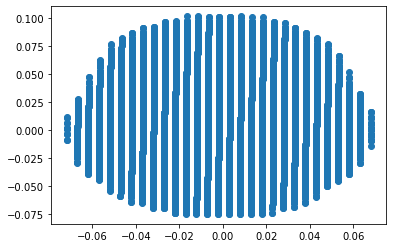

In [20]:
plt.plot(dip_pos[:, 0], dip_pos[:, 1], 'o')

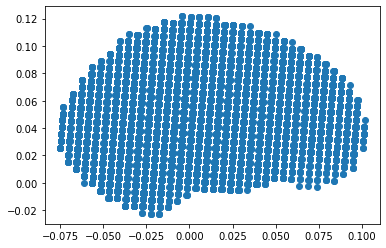

In [21]:
plt.plot(dip_pos[:, 1], dip_pos[:, 2], 'o')

In [24]:
points_found, label_codes, label_strings = get_labels_of_points(dip_pos, atlas="aal2")
if not np.all(points_found):
    print("Not all sources were assigned to regions.")

print(label_codes.shape)

In [22]:
leadfield = forward_solution['sol']['data']

In [35]:
print(dip_pos.shape)

(14629, 3)


In [37]:
dip_pos = dip_pos*1e3

In [38]:
points_found, label_codes, label_strings = get_labels_of_points(dip_pos, atlas="aal2")
if not np.all(points_found):
    print("Not all sources were assigned to regions.")

print(label_codes.shape)

ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The a

Not all sources were assigned to regions.
(14629,)


In [39]:
sum(points_found)

14236

In [40]:
14629 - 14236

393

In [45]:
not_found_indices = np.where(np.array(points_found) == False)

In [47]:
not_found_indices[0].shape

(393,)

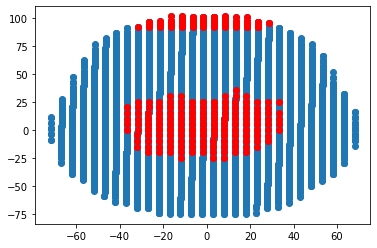

In [49]:
# plot only points that were not captured by atlas
plt.plot(dip_pos[:, 0], dip_pos[:, 1], 'o')
plt.plot(dip_pos[not_found_indices[0], 0], dip_pos[not_found_indices[0], 1], 'ro')

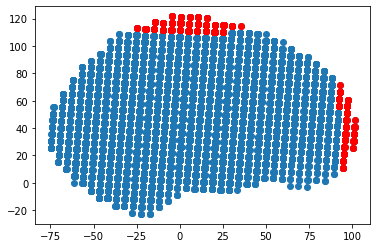

In [51]:
# plot only points that were not captured by atlas
plt.plot(dip_pos[:, 1], dip_pos[:, 2], 'o')
plt.plot(dip_pos[not_found_indices[0], 1], dip_pos[not_found_indices[0], 2], 'ro')

In [55]:
from ni_eeg_forward_project.util import plot_glassbrain_projections

[autoreload of ni_eeg_forward_project.util failed: Traceback (most recent call last):
  File "/Users/martin/anaconda3/envs/mne/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/martin/anaconda3/envs/mne/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/martin/anaconda3/envs/mne/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/ni_eeg_forward_project/util/__init__.py", line 2, in <module>
    from plot_regions import plot_glassbrain_projections
ModuleNotFoundError: No module named 'plot_regions

ImportError: cannot import name 'plot_glassbrain_projections' from 'ni_eeg_forward_project.util' (/Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/ni_eeg_forward_project/util/__init__.py)